### Brainstorming:
#### At A Basic Level:
 + How many trips were there in total and can we verify this from checking the data?

#### As A Decision Maker:
 + Where are the bike trips taking place?
 + Who are the repeating users?
 + Who are using the bicycles and when?
 + When does the conversion happen?
 >(i.e)IN ORDER TO BETTER ALLOCATE RESOURCES AND BOOST RIDERSHIP NUMBERS

#### Other Questions Include:
 + Where are the most popular bike stations for borrowing bicycles?
 + Perhaps the prediction model can help us make sure that everyone who wants to borrow a bike has access to one.
 + What are the popular stations for borrowing bicycles?
 
#### From A Product Perspective:(Focusing on the end user)
 + We don't want someone borrowing a bike having to return it 20 mins away because the closest bike station is full. If this happens alot then the user retention rate will drop.

In [1]:
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('citi_bike_trip_data.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,326,01/10/2013 00:01,01/10/2013 00:06,239,Willoughby St & Fleet St,40.691966,-73.981302,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,16052,Subscriber,1982,1
1,729,01/10/2013 00:01,01/10/2013 00:13,322,Clinton St & Tillary St,40.696192,-73.991218,398,Atlantic Ave & Furman St,40.691652,-73.999979,19412,Customer,\N,0
2,520,01/10/2013 00:01,01/10/2013 00:10,174,E 25 St & 1 Ave,40.738177,-73.977387,403,E 2 St & 2 Ave,40.725029,-73.990697,19645,Subscriber,1984,1
3,281,01/10/2013 00:01,01/10/2013 00:06,430,York St & Jay St,40.701485,-73.986569,323,Lawrence St & Willoughby St,40.692362,-73.986317,16992,Subscriber,1985,1
4,196,01/10/2013 00:01,01/10/2013 00:04,403,E 2 St & 2 Ave,40.725029,-73.990697,401,Allen St & Rivington St,40.720196,-73.989978,15690,Subscriber,1986,1


In [3]:
df.shape

(40575, 15)

In [4]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [5]:
df.describe() # Statistical summary 

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000,40575.000000
mean,822.374640,449.396155,40.735229,-73.991093,450.073370,40.734885,-73.991212,17634.191547,1.137671
std,984.000376,362.462577,0.019599,0.012346,369.780126,0.019600,0.012483,1703.451047,0.527477
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14531.000000,0.000000
25%,408.000000,306.000000,40.721816,-74.000264,305.000000,40.721816,-74.001497,16146.000000,1.000000
50%,638.000000,405.000000,40.737050,-73.990765,404.000000,40.736529,-73.990931,17651.000000,1.000000
75%,1028.000000,487.000000,40.750450,-73.982050,487.000000,40.750224,-73.982050,19093.000000,1.000000
max,56629.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,20664.000000,2.000000


<AxesSubplot:xlabel='tripduration', ylabel='Count'>

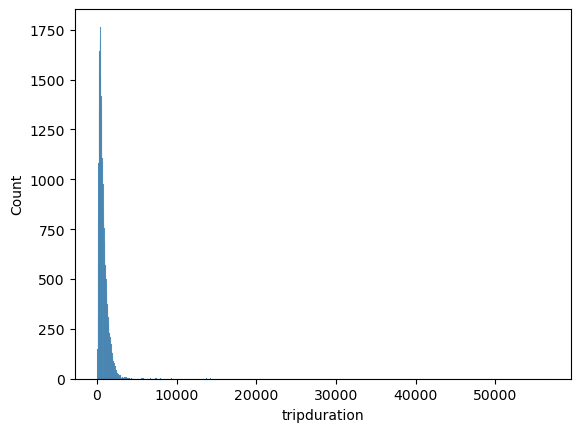

In [6]:
sns.histplot(df["tripduration"]) # A look at the distribution for 'tripduration'

With the above HistPlot(Histogram), I'm able to see the outliers range, most of the trips are near the 10 minute mark

In [7]:
# sns.pairplot(df) 
# To quickly look at the relationship among variables, 
# NB. Not recommended for large datasets because it takes very long to load

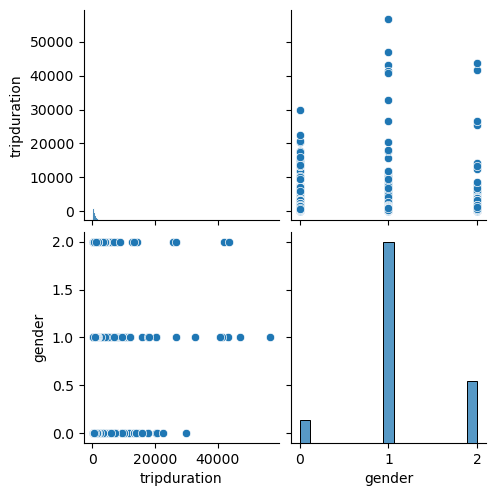

In [8]:
sns.pairplot(df[['tripduration', 'gender']])

In [9]:
# What number of the users are Subscribers?
num_subs = df['usertype'].loc[df['usertype'] == 'Subscriber'].count()
num_subs

37343

In [10]:
# What number of the users are Customers?
num_cus = df['usertype'].loc[df['usertype'] == 'Customer'].count()
num_cus

3232

In [11]:
total = len(df)
total

40575

In [12]:
# What %tage of the users are Subscribers?
num_subs = df['usertype'].loc[df['usertype'] == 'Subscriber'].count()
total = len(df)
print(round(num_subs/total*100, 2), '% of total riders on 1st October, 2013 are annual subscribers')

92.03 % of total riders on 1st October, 2013 are annual subscribers


In [13]:
# What %tage of users are Customers?
num_cus = df['usertype'].loc[df['usertype'] == 'Customer'].count()
total= len(df)
print(round(num_cus/total*100, 2), '% of total riders on 1st October, 2013 are daily Customers')

7.97 % of total riders on 1st October, 2013 are daily Customers


### Q1: How does Trip Length Vary based on Trip Start Time?

In [14]:
df.starttime.apply(lambda x:x[11:13]).astype('str') # lambda function is more efficient when running large datasets

0        00
1        00
2        00
3        00
4        00
         ..
40570    23
40571    23
40572    23
40573    23
40574    23
Name: starttime, Length: 40575, dtype: object

In [15]:
df['hour'] = df.starttime.apply(lambda x:x[11:13]).astype('str') # To add a hour column to the df dataset
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,hour
0,326,01/10/2013 00:01,01/10/2013 00:06,239,Willoughby St & Fleet St,40.691966,-73.981302,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,16052,Subscriber,1982,1,00
1,729,01/10/2013 00:01,01/10/2013 00:13,322,Clinton St & Tillary St,40.696192,-73.991218,398,Atlantic Ave & Furman St,40.691652,-73.999979,19412,Customer,\N,0,00
2,520,01/10/2013 00:01,01/10/2013 00:10,174,E 25 St & 1 Ave,40.738177,-73.977387,403,E 2 St & 2 Ave,40.725029,-73.990697,19645,Subscriber,1984,1,00
3,281,01/10/2013 00:01,01/10/2013 00:06,430,York St & Jay St,40.701485,-73.986569,323,Lawrence St & Willoughby St,40.692362,-73.986317,16992,Subscriber,1985,1,00
4,196,01/10/2013 00:01,01/10/2013 00:04,403,E 2 St & 2 Ave,40.725029,-73.990697,401,Allen St & Rivington St,40.720196,-73.989978,15690,Subscriber,1986,1,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40570,273,01/10/2013 23:59,02/10/2013 00:04,537,Lexington Ave & E 24 St,40.740259,-73.984092,461,E 20 St & 2 Ave,40.735877,-73.982050,17503,Subscriber,1989,1,23
40571,563,01/10/2013 23:59,02/10/2013 00:09,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,437,Macon St & Nostrand Ave,40.680983,-73.950048,16048,Subscriber,1991,2,23
40572,490,01/10/2013 23:59,02/10/2013 00:08,470,W 20 St & 8 Ave,40.743453,-74.000040,404,9 Ave & W 14 St,40.740583,-74.005509,20006,Customer,\N,0,23
40573,1289,01/10/2013 23:59,02/10/2013 00:21,322,Clinton St & Tillary St,40.696192,-73.991218,311,Norfolk St & Broome St,40.717227,-73.988021,16577,Subscriber,1962,2,23


<AxesSubplot:xlabel='hour', ylabel='tripduration'>

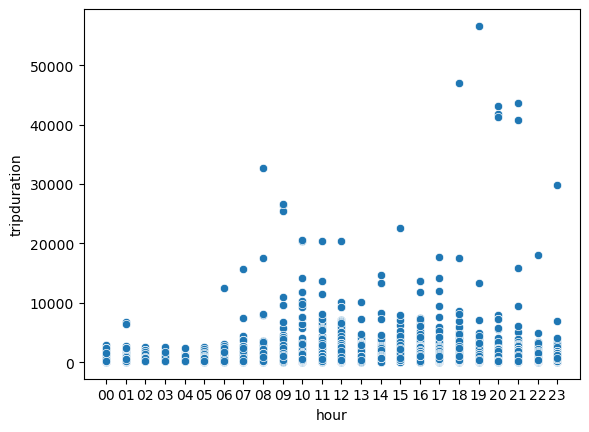

In [16]:
# Visualize the correlation
sns.scatterplot(x= 'hour', y= 'tripduration', data = df)

From the Scatter plot Above: we can see that during the early hours of day i.e from midnight(12:00AM) to 6:00AM trips are shorter, during day between 7AM and Noon(12:00PM) the trips are longer, also during evening rush hours there are longer trips as well.

<AxesSubplot:xlabel='hour', ylabel='tripduration'>

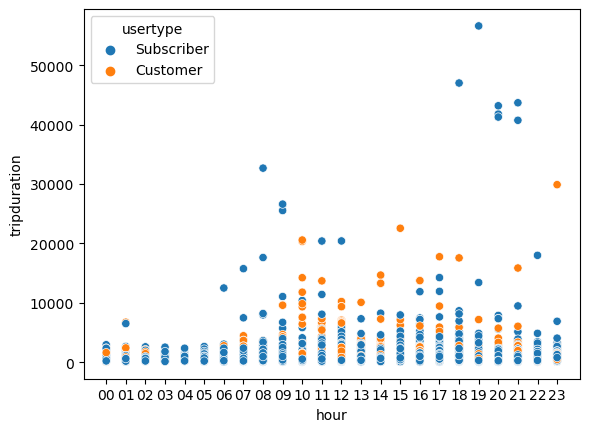

In [17]:
sns.scatterplot(x= 'hour', y= 'tripduration', data = df, hue = 'usertype') # Add a 3rd variation

In the above Scatter plot: I can deduce that Subscribers take longer trips(The Outliers) than the Customers. Also, the concentration in trip duration is almost equal for both Customers and Subscribers across the time stamps in usage

### Qn2:  Which Bike stations are most popular to start trips from?

In order to visualise counts for different Bike stations on a map, I have to make a new DataFrame using the groupby method to count how many trips were taking place from each station.

In [18]:
df2 = df.groupby(['start station id']).size().reset_index(name= 'counts')
df2

,start station id,counts
0,72,112
1,79,91
2,82,39
3,83,52
4,116,213
...,...,...
323,2017,127
324,2021,228
325,2022,105
326,2023,74


+ I have add the longitude and latitude columns to the above newly created DataFrame object df2 by droping the duplicates

In [19]:
temp_df = df.drop_duplicates('start station id')
temp_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,hour
0,326,01/10/2013 00:01,01/10/2013 00:06,239,Willoughby St & Fleet St,40.691966,-73.981302,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,16052,Subscriber,1982,1,00
1,729,01/10/2013 00:01,01/10/2013 00:13,322,Clinton St & Tillary St,40.696192,-73.991218,398,Atlantic Ave & Furman St,40.691652,-73.999979,19412,Customer,\N,0,00
2,520,01/10/2013 00:01,01/10/2013 00:10,174,E 25 St & 1 Ave,40.738177,-73.977387,403,E 2 St & 2 Ave,40.725029,-73.990697,19645,Subscriber,1984,1,00
3,281,01/10/2013 00:01,01/10/2013 00:06,430,York St & Jay St,40.701485,-73.986569,323,Lawrence St & Willoughby St,40.692362,-73.986317,16992,Subscriber,1985,1,00
4,196,01/10/2013 00:01,01/10/2013 00:04,403,E 2 St & 2 Ave,40.725029,-73.990697,401,Allen St & Rivington St,40.720196,-73.989978,15690,Subscriber,1986,1,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,2190,01/10/2013 08:49,01/10/2013 09:25,2001,7 Ave & Farragut St,40.698921,-73.973330,2001,7 Ave & Farragut St,40.698921,-73.973330,16922,Customer,\N,0,08
8724,1367,01/10/2013 09:18,01/10/2013 09:41,372,Franklin Ave & Myrtle Ave,40.694528,-73.958089,418,Front St & Gold St,40.702240,-73.982578,14785,Subscriber,1985,2,09
9334,1451,01/10/2013 09:31,01/10/2013 09:56,260,Broad St & Bridge St,40.703652,-74.011678,534,Water - Whitehall Plaza,40.702551,-74.012723,20237,Subscriber,1979,1,09
9796,469,01/10/2013 09:42,01/10/2013 09:50,289,Monroe St & Classon Ave,40.684568,-73.958811,373,Willoughby Ave & Walworth St,40.693317,-73.953820,15858,Subscriber,1977,1,09


+ Now I have 328 rows that matches the unique 'start station id' that I filtered above

In [20]:
temp_df = df.drop_duplicates('start station id')
# left join
df3 = pd.merge(df2, temp_df[['start station id', 'start station name', 'start station latitude', 'start station longitude']], 
        how = 'left', on = ['start station id'])
df3

,start station id,counts,start station name,start station latitude,start station longitude
0,72,112,W 52 St & 11 Ave,40.767272,-73.993929
1,79,91,Franklin St & W Broadway,40.719116,-74.006667
2,82,39,St James Pl & Pearl St,40.711174,-74.000165
3,83,52,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323
4,116,213,W 17 St & 8 Ave,40.741776,-74.001497
...,...,...,...,...,...
323,2017,127,E 43 St & 2 Ave,40.750224,-73.971214
324,2021,228,W 45 St & 8 Ave,40.759291,-73.988597
325,2022,105,E 59 St & Sutton Pl,40.758491,-73.959206
326,2023,74,E 55 St & Lexington Ave,40.759681,-73.970314


#### For visualisation on the map I will use Folium(An alternative is goe-pandas)

In [21]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [22]:
import folium

In [23]:
# Initialising an empty folium map object
# This is where the origibnal anti map will be centered around

m = folium.Map(location = [40.696192, -73.991218], tiles = 'OpenStreetMap', zoom_start = 12) 
m

In [24]:
for _ in range(0, len(df2)):
    folium.Circle(
        location = [df3.iloc[_] ['start station latitude'], df3.iloc[_] ['start station longitude']],
        popup = [df3.iloc[_] ['start station name']],
        radius = float(df3.iloc[_] ['counts'])/2,
        color = 'red',
        fill  = True, fill_color = 'red'
    ).add_to(m)

In [25]:
m